In [3]:
#!pip install pyproj

# First dataset cleaning

In [12]:
import pandas as pd

df = pd.read_csv("lo_2011_2024.csv", sep=";")

# Display all column names
df.columns.tolist()

['Juhtumi nr',
 'Toimumisaeg',
 'Isikuid',
 'Hukkunuid',
 'Sõidukeid',
 'Vigastatuid',
 'Aadress',
 'Tänav',
 'Maja nr',
 'Ristuv tänav',
 'Tee nr',
 'Tee km',
 'Maakond',
 'Omavalitsus',
 'Asutusüksus',
 'Asula',
 'Liiklusõnnetuse liik',
 'Liiklusõnnetuse liik (detailne)',
 'Joobes mootorsõidukijuhi osalusel',
 'Kergliikurijuhi osalusel',
 'Jalakäija osalusel',
 'Kaassõitja osalusel',
 'Maastikusõiduki juhi osalusel',
 'Eaka (65+) mootorsõidukijuhi osalusel',
 'Bussijuhi osalusel',
 'Veoautojuhi osalusel',
 'Ühissõidukijuhi osalusel',
 'Sõiduautojuhi osalusel',
 'Mootorratturi osalusel',
 'Mopeedijuhi osalusel',
 'Jalgratturi osalusel',
 'Alaealise osalusel',
 'Esmase juhiloa omaniku osalusel',
 'Turvavarustust mitte kasutanud isiku osalusel',
 'Mootorsõidukijuhi osalusel',
 'Tüüpskeemi nr',
 'Tüüpskeem',
 'Tee tüüp',
 'Tee tüüp (detailne)',
 'Tee liik',
 'Tee element',
 'Tee element (detailne)',
 'Tee objekt',
 'Kurvilisus',
 'Tee tasasus',
 'Tee seisund',
 'Teekate',
 'Teekatte seis

In [13]:
# columns that are not needed
address_keywords = ['aadress', 'tänav', 'maja nr', 'ristuv tänav', 'tee nr',
                    'tee km', 'maakond', 'omavalitsus', 'asutusüksus',
                    'asula', 'tüüpskeemi nr', 'tüüpskeem']

# Find all columns that should be removed (case-insensitive)
notneeded_cols = [col for col in df.columns 
                  if any(k in col.lower() for k in address_keywords)]

notneeded_cols

['Aadress',
 'Tänav',
 'Maja nr',
 'Ristuv tänav',
 'Tee nr',
 'Tee km',
 'Maakond',
 'Omavalitsus',
 'Asutusüksus',
 'Asula',
 'Tüüpskeemi nr',
 'Tüüpskeem']

In [14]:
df_clean = df.drop(columns=notneeded_cols)
df_clean.head()

Juhtumi nr          Toimumisaeg  Isikuid  Hukkunuid  Sõidukeid  \
0  2302110069111  2011-03-23 19:00:00      2.0          0        1.0   
1  3100190537537  2019-09-09 18:15:00      2.0          0        2.0   
2  3120160082225  2016-09-25 14:58:00      2.0          0        2.0   
3  2402130040217  2013-05-15 13:00:00      2.0          0        2.0   
4  3130130001587  2013-06-12 01:20:00      1.0          0        1.0   

   Vigastatuid Liiklusõnnetuse liik    Liiklusõnnetuse liik (detailne)  \
0            1    Ühesõidukiõnnetus  Kokkupõrge teel oleva takistusega   
1            1           Kokkupõrge       Kokkupõrge sõidukiga küljelt   
2            1           Kokkupõrge   Kokkupõrge ees liikuva sõidukiga   
3            1           Kokkupõrge   Kokkupõrge vastutuleva sõidukiga   
4            1    Ühesõidukiõnnetus   Kokkupõrge teevälise takistusega   

   Joobes mootorsõidukijuhi osalusel  Kergliikurijuhi osalusel  ...  \
0                                0.0                       0.0  ...   
1                                0.0                       0.0  ...   
2                                0.0                       0.0  ...   
3                                0.0                       0.0  ...   
4                                0.0                       0.0  ...   

             Tee seisund   Teekate  Teekatte seisund  Sõiduradade arv  \
0  Sõidutee on ebatasane  Püsikate              Kuiv              NaN   
1     Sõidutee on korras  Püsikate              Kuiv                2   
2     Sõidutee on korras  Püsikate              Kuiv                2   
3     Sõidutee on korras  Püsikate              Kuiv              NaN   
4     Sõidutee on korras  Püsikate              Kuiv              NaN   

   Lubatud sõidukiirus       Ilmastik   Valgustus  \
0                 30.0    Selged olud   Valge aeg   
1                 70.0    Selged olud   Valge aeg   
2                 90.0    Selged olud   Valge aeg   
3                 50.0    Selged olud   Valge aeg   
4                 50.0  Pilvised olud  Pimeda aeg   

          Valgustus (detailne)  X koordinaat  Y koordinaat  
0                    Valge aeg           NaN           NaN  
1                    Valge aeg    6594053.96     565597.65  
2                    Valge aeg    6479645.27     662530.53  
3                    Valge aeg    6588149.00     734366.00  
4  Pimeda ajal valgustus põleb    6579170.00     634253.00  

[5 rows x 43 columns]

In [15]:
df_clean.columns.tolist()

['Juhtumi nr',
 'Toimumisaeg',
 'Isikuid',
 'Hukkunuid',
 'Sõidukeid',
 'Vigastatuid',
 'Liiklusõnnetuse liik',
 'Liiklusõnnetuse liik (detailne)',
 'Joobes mootorsõidukijuhi osalusel',
 'Kergliikurijuhi osalusel',
 'Jalakäija osalusel',
 'Kaassõitja osalusel',
 'Maastikusõiduki juhi osalusel',
 'Eaka (65+) mootorsõidukijuhi osalusel',
 'Bussijuhi osalusel',
 'Veoautojuhi osalusel',
 'Ühissõidukijuhi osalusel',
 'Sõiduautojuhi osalusel',
 'Mootorratturi osalusel',
 'Mopeedijuhi osalusel',
 'Jalgratturi osalusel',
 'Alaealise osalusel',
 'Esmase juhiloa omaniku osalusel',
 'Turvavarustust mitte kasutanud isiku osalusel',
 'Mootorsõidukijuhi osalusel',
 'Tee tüüp',
 'Tee tüüp (detailne)',
 'Tee liik',
 'Tee element',
 'Tee element (detailne)',
 'Tee objekt',
 'Kurvilisus',
 'Tee tasasus',
 'Tee seisund',
 'Teekate',
 'Teekatte seisund',
 'Sõiduradade arv',
 'Lubatud sõidukiirus',
 'Ilmastik',
 'Valgustus',
 'Valgustus (detailne)',
 'X koordinaat',
 'Y koordinaat']

In [16]:
rename_map = {
    "Juhtumi nr": "CaseID",
    "Toimumisaeg": "DateTime",
    "Isikuid": "Persons",
    "Hukkunuid": "Fatalities",
    "Sõidukeid": "Vehicles",
    "Vigastatuid": "Injured",

    "Liiklusõnnetuse liik": "AccidentType",
    "Liiklusõnnetuse liik (detailne)": "AccidentTypeDetailed",

    "Joobes mootorsõidukijuhi osalusel": "InvolvingIntoxicatedDriver",
    "Kergliikurijuhi osalusel": "InvolvingLightVehicleDriver",
    "Jalakäija osalusel": "InvolvingPedestrian",
    "Kaassõitja osalusel": "InvolvingPassenger",
    "Maastikusõiduki juhi osalusel": "InvolvingATVDriver",
    "Eaka (65+) mootorsõidukijuhi osalusel": "InvolvingElderlyDriver",
    "Bussijuhi osalusel": "InvolvingBusDriver",
    "Veoautojuhi osalusel": "InvolvingTruckDriver",
    "Ühissõidukijuhi osalusel": "InvolvingPublicTransportDriver",
    "Sõiduautojuhi osalusel": "InvolvingCarDriver",
    "Mootorratturi osalusel": "InvolvingMotorcyclist",
    "Mopeedijuhi osalusel": "InvolvingMopedDriver",
    "Jalgratturi osalusel": "InvolvingCyclist",
    "Alaealise osalusel": "InvolvingMinor",
    "Esmase juhiloa omaniku osalusel": "InvolvingFirstLicenseDriver",
    "Turvavarustust mitte kasutanud isiku osalusel": "InvolvingNoSafetyEquipment",
    "Mootorsõidukijuhi osalusel": "InvolvingMotorVehicleDriver",

    "Tee tüüp": "RoadType",
    "Tee tüüp (detailne)": "RoadTypeDetailed",
    "Tee liik": "RoadCategory",
    "Tee element": "RoadElement",
    "Tee element (detailne)": "RoadElementDetailed",
    "Tee objekt": "RoadObject",
    "Kurvilisus": "Curvature",
    "Tee tasasus": "RoadEvenness",
    "Tee seisund": "RoadCondition",
    "Teekate": "RoadSurface",
    "Teekatte seisund": "RoadSurfaceCondition",
    "Sõiduradade arv": "NumberOfLanes",
    "Lubatud sõidukiirus": "SpeedLimit",

    "Ilmastik": "Weather",
    "Valgustus": "Lighting",
    "Valgustus (detailne)": "LightingDetailed",

    "X koordinaat": "X_Coord",
    "Y koordinaat": "Y_Coord"
}

df_clean = df_clean.rename(columns=rename_map)

df_clean.head()

CaseID             DateTime  Persons  Fatalities  Vehicles  Injured  \
0  2302110069111  2011-03-23 19:00:00      2.0           0       1.0        1   
1  3100190537537  2019-09-09 18:15:00      2.0           0       2.0        1   
2  3120160082225  2016-09-25 14:58:00      2.0           0       2.0        1   
3  2402130040217  2013-05-15 13:00:00      2.0           0       2.0        1   
4  3130130001587  2013-06-12 01:20:00      1.0           0       1.0        1   

        AccidentType               AccidentTypeDetailed  \
0  Ühesõidukiõnnetus  Kokkupõrge teel oleva takistusega   
1         Kokkupõrge       Kokkupõrge sõidukiga küljelt   
2         Kokkupõrge   Kokkupõrge ees liikuva sõidukiga   
3         Kokkupõrge   Kokkupõrge vastutuleva sõidukiga   
4  Ühesõidukiõnnetus   Kokkupõrge teevälise takistusega   

   InvolvingIntoxicatedDriver  InvolvingLightVehicleDriver  ...  \
0                         0.0                          0.0  ...   
1                         0.0                          0.0  ...   
2                         0.0                          0.0  ...   
3                         0.0                          0.0  ...   
4                         0.0                          0.0  ...   

           RoadCondition  RoadSurface  RoadSurfaceCondition  NumberOfLanes  \
0  Sõidutee on ebatasane     Püsikate                  Kuiv            NaN   
1     Sõidutee on korras     Püsikate                  Kuiv              2   
2     Sõidutee on korras     Püsikate                  Kuiv              2   
3     Sõidutee on korras     Püsikate                  Kuiv            NaN   
4     Sõidutee on korras     Püsikate                  Kuiv            NaN   

   SpeedLimit        Weather    Lighting             LightingDetailed  \
0        30.0    Selged olud   Valge aeg                    Valge aeg   
1        70.0    Selged olud   Valge aeg                    Valge aeg   
2        90.0    Selged olud   Valge aeg                    Valge aeg   
3        50.0    Selged olud   Valge aeg                    Valge aeg   
4        50.0  Pilvised olud  Pimeda aeg  Pimeda ajal valgustus põleb   

      X_Coord    Y_Coord  
0         NaN        NaN  
1  6594053.96  565597.65  
2  6479645.27  662530.53  
3  6588149.00  734366.00  
4  6579170.00  634253.00  

[5 rows x 43 columns]

In [17]:
import pandas as pd

# eeldame, et sul on df_clean olemas

# --- 1) Lihtsad veerud: 1 väärtus -> 1 sõna --------------------

value_maps_simple = {
    "RoadSurface": {  # Teekate
        "Püsikate": "Paved",
        "Kruusatee": "Gravel",
        "Kivisillutiskate": "Cobblestone",
        "Pinnastee": "Unpaved",
    },
    "RoadSurfaceCondition": {  # Teekatte seisund
        "Kuiv": "Dry",
        "Märg": "Wet",
        "Lumelörts, soolalumine segu": "SlushSalt",
        "Sõidujäljed puhtad, sõidujälgede vahe lumine": "TracksSnow",
        "Töötlemata pinnaga jäätunud märg kate, jäide": "IcyWet",
        "Töödeldud pinnaga jäätunud kate": "IcyTreated",
        "Töödeldud pinnaga kinnisõidetud lumi": "PackedSnowTreated",
        "Töötlemata pinnaga kinnisõidetud lumi": "PackedSnow",
        "Töötlemata pinnaga jäätunud kuiv kate": "IcyDry",
        "Kohev lahtine lumi": "LooseSnow",
        "Pori, saaste": "MudDirt",
        "Muu": "Other",
        "Muu libedus - lehed, liiv, muda, õli": "OtherSlippery",
        "Lumi, jää - tavalised libeduse põhjustajad": "SnowIce",
        "Pole teada": "Unknown",
    },
    "Lighting": {
        "Valge aeg": "Day",
        "Pimeda aeg": "Dark",
        "Teadmine puudub": "Unknown",
    },
}

for col, mapping in value_maps_simple.items():
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(mapping)

# --- 2) Mitme-väärtusega veerud: komadega loetelud -------------- 

weather_tokens = {  # Ilmastik
    "Selged olud": "Clear",
    "Pilvised olud": "Cloudy",
    "Udused olud": "Foggy",
    "Lumised olud": "Snowy",
    "Vihmasadu": "Rain",
    "Lumesadu": "Snow",
    "Lörts": "Sleet",
    "rahe": "Hail",
    "Madal vastu paistev päike": "LowSun",
    "Tuisune või tormine": "Storm",
    "Tuisk või torm": "Storm",
    "Pilvine": "Cloudy",
    "Tugev tuul": "Wind",
    "Pole teada": "Unknown",
    "Muu": "Other",
}

roadcond_tokens = {  # Tee seisund
    "Sõidutee on korras": "RoadOK",
    "Sõidutee on ebatasane": "RoadUneven",
    "Sõidutee on libe": "RoadSlippery",
    "Sõiduteel on takistus": "Obstacle",
    "Teepeenar on halvas seisukorras": "ShoulderBad",
    "Teekattemärgistus puudub": "NoMarkings",
    "Nähtavus on piiratud": "LowVisibility",
    "Puu (post) teepeenral (eraldusribal)": "TreePost",
    "Ohtliku koha tähistus puudub": "HazardUnmarked",
    "Teeremondikoha tähistus on puudulik": "WorkZoneBad",
    "Ajutine liikluskorraldus": "TempTraffic",
    "Foor ei tööta, ei ole nähtav": "SignalOff",
    "Foori ei ole": "NoSignal",
    "Liiklusmärk puudub, ei ole nähtav": "SignMissing",
    "Teadmine puudub": "Unknown",
}

def translate_multi(series, token_map):
    def _t(val):
        if pd.isna(val):
            return val
        parts = [p.strip() for p in str(val).split(",")]
        translated = [token_map.get(p, p) for p in parts]
        return ",".join(translated)
    return series.map(_t)

if "Weather" in df_clean.columns:
    df_clean["Weather"] = translate_multi(df_clean["Weather"], weather_tokens)

if "RoadCondition" in df_clean.columns:
    df_clean["RoadCondition"] = translate_multi(df_clean["RoadCondition"], roadcond_tokens)

# LightingDetailed – kui tahad ka lühendada, saab sama mustriga hiljem lisada

# --- 3) Üldine fallback: "Teadmine puudub"/"Pole teada" -> "Unknown" ----

df_clean = df_clean.replace(
    {"Teadmine puudub": "Unknown", "Pole teada": "Unknown"}
)

# --- Lisa-tõlge: AccidentType, AccidentTypeDetailed, LightingDetailed ----

accident_type_map = {
    "Ühesõidukiõnnetus": "SingleVehicle",
    "Kokkupõrge": "Collision",
    "Jalakäijaõnnetus": "PedestrianAccident",
    "Muu liiklusõnnetus": "OtherAccident",
    "Teadmata": "Unknown",
}

accident_type_detailed_map = {
    "Kokkupõrge teel oleva takistusega": "CollisionRoadObstacle",
    "Kokkupõrge sõidukiga küljelt": "CollisionSide",
    "Kokkupõrge ees liikuva sõidukiga": "CollisionRearMoving",
    "Kokkupõrge vastutuleva sõidukiga": "CollisionHeadOn",
    "Kokkupõrge teevälise takistusega": "CollisionOffRoadObstacle",
    "Kokkupõrge jalakäijaga": "CollisionPedestrian",
    "Sõidukite külgkokkupõrge": "CollisionSideVehicles",
    "Sõiduki ümberpaiskumine teel": "VehicleRollover",
    "Kukkumine ühissõidukis": "FallInPublicTransport",
    "Sõiduki teelt väljasõit": "RunOffRoad",
    "Kokkupõrge ees seisva sõidukiga": "CollisionParked",
    "Kokkupõrge loomaga": "CollisionAnimal",
    "Muu liiklusõnnetus": "OtherAccident",
    "Teadmata": "Unknown",
}

lighting_detailed_map = {
    "Valge aeg": "Day",
    "Pimeda ajal valgustus põleb": "DarkLightOn",
    "Pimeda ajal valgustus ei põle": "DarkLightsOff",
    "Pimeda ajal valgustus puudub": "DarkNoLights",
    "Teadmine puudub": "Unknown",
}

if "AccidentType" in df_clean.columns:
    df_clean["AccidentType"] = df_clean["AccidentType"].replace(accident_type_map)

if "AccidentTypeDetailed" in df_clean.columns:
    df_clean["AccidentTypeDetailed"] = df_clean["AccidentTypeDetailed"].replace(accident_type_detailed_map)

if "LightingDetailed" in df_clean.columns:
    df_clean["LightingDetailed"] = df_clean["LightingDetailed"].replace(lighting_detailed_map)

# soovi korral uuesti salvestada
# df_clean.to_csv("lo_2011_2024_clean_english.csv", sep=";", index=False)


df_clean.head()

# soovi korral salvestame uue ingliskeelsete väärtustega faili
#df_clean.to_csv("lo_2011_2024_clean_english.csv", sep=";", index=False)


CaseID             DateTime  Persons  Fatalities  Vehicles  Injured  \
0  2302110069111  2011-03-23 19:00:00      2.0           0       1.0        1   
1  3100190537537  2019-09-09 18:15:00      2.0           0       2.0        1   
2  3120160082225  2016-09-25 14:58:00      2.0           0       2.0        1   
3  2402130040217  2013-05-15 13:00:00      2.0           0       2.0        1   
4  3130130001587  2013-06-12 01:20:00      1.0           0       1.0        1   

    AccidentType      AccidentTypeDetailed  InvolvingIntoxicatedDriver  \
0  SingleVehicle     CollisionRoadObstacle                         0.0   
1      Collision             CollisionSide                         0.0   
2      Collision       CollisionRearMoving                         0.0   
3      Collision           CollisionHeadOn                         0.0   
4  SingleVehicle  CollisionOffRoadObstacle                         0.0   

   InvolvingLightVehicleDriver  ...  RoadCondition  RoadSurface  \
0                          0.0  ...     RoadUneven        Paved   
1                          0.0  ...         RoadOK        Paved   
2                          0.0  ...         RoadOK        Paved   
3                          0.0  ...         RoadOK        Paved   
4                          0.0  ...         RoadOK        Paved   

   RoadSurfaceCondition  NumberOfLanes  SpeedLimit  Weather  Lighting  \
0                   Dry            NaN        30.0    Clear       Day   
1                   Dry              2        70.0    Clear       Day   
2                   Dry              2        90.0    Clear       Day   
3                   Dry            NaN        50.0    Clear       Day   
4                   Dry            NaN        50.0   Cloudy      Dark   

   LightingDetailed     X_Coord    Y_Coord  
0               Day         NaN        NaN  
1               Day  6594053.96  565597.65  
2               Day  6479645.27  662530.53  
3               Day  6588149.00  734366.00  
4       DarkLightOn  6579170.00  634253.00  

[5 rows x 43 columns]

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20947 entries, 0 to 20946
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CaseID                          20947 non-null  object 
 1   DateTime                        20947 non-null  object 
 2   Persons                         20689 non-null  float64
 3   Fatalities                      20947 non-null  int64  
 4   Vehicles                        20689 non-null  float64
 5   Injured                         20947 non-null  int64  
 6   AccidentType                    20947 non-null  object 
 7   AccidentTypeDetailed            20947 non-null  object 
 8   InvolvingIntoxicatedDriver      20724 non-null  float64
 9   InvolvingLightVehicleDriver     20724 non-null  float64
 10  InvolvingPedestrian             20724 non-null  float64
 11  InvolvingPassenger              20724 non-null  float64
 12  InvolvingATVDriver              

In [19]:
df_clean["DateTime"] = pd.to_datetime(df_clean["DateTime"])

In [22]:
#dropping this column because too many null values
df_clean = df_clean.drop(columns=["NumberOfLanes"])

In [23]:
df_clean["Year"] = df_clean["DateTime"].dt.year
df_clean["Month"] = df_clean["DateTime"].dt.month
df_clean["Weekday"] = df_clean["DateTime"].dt.day_name()

In [24]:
df_clean.describe(include='all')

CaseID                       DateTime       Persons  \
count           20947                          20947  20689.000000   
unique          20947                            NaN           NaN   
top     2101240078374                            NaN           NaN   
freq                1                            NaN           NaN   
mean              NaN  2018-05-01 12:02:38.019716352      1.897047   
min               NaN            2011-01-01 02:55:00      0.000000   
25%               NaN            2014-09-28 06:31:30      1.000000   
50%               NaN            2018-06-23 13:00:00      2.000000   
75%               NaN            2021-12-30 19:50:00      2.000000   
max               NaN            2024-11-29 02:38:00     27.000000   
std               NaN                            NaN      1.051614   

          Fatalities      Vehicles       Injured AccidentType  \
count   20947.000000  20689.000000  20947.000000        20947   
unique           NaN           NaN           NaN            5   
top              NaN           NaN           NaN    Collision   
freq             NaN           NaN           NaN         8076   
mean        0.044684      1.495384      1.192534          NaN   
min         0.000000      0.000000      0.000000          NaN   
25%         0.000000      1.000000      1.000000          NaN   
50%         0.000000      1.000000      1.000000          NaN   
75%         0.000000      2.000000      1.000000          NaN   
max         4.000000     22.000000     23.000000          NaN   
std         0.225401      0.769494      0.765885          NaN   

       AccidentTypeDetailed  InvolvingIntoxicatedDriver  \
count                 20947                20724.000000   
unique                   14                         NaN   
top     CollisionPedestrian                         NaN   
freq                   4543                         NaN   
mean                    NaN                    0.097761   
min                     NaN                    0.000000   
25%                     NaN                    0.000000   
50%                     NaN                    0.000000   
75%                     NaN                    0.000000   
max                     NaN                    1.000000   
std                     NaN                    0.296998   

        InvolvingLightVehicleDriver  ...  RoadSurfaceCondition    SpeedLimit  \
count                  20724.000000  ...                 19974  19224.000000   
unique                          NaN  ...                    15           NaN   
top                             NaN  ...                   Dry           NaN   
freq                            NaN  ...                 13033           NaN   
mean                       0.062102  ...                   NaN     59.875260   
min                        0.000000  ...                   NaN      0.000000   
25%                        0.000000  ...                   NaN     50.000000   
50%                        0.000000  ...                   NaN     50.000000   
75%                        0.000000  ...                   NaN     90.000000   
max                        1.000000  ...                   NaN    901.000000   
std                        0.241346  ...                   NaN     21.965581   

        Weather  Lighting  LightingDetailed       X_Coord        Y_Coord  \
count     19961     20035             20035  1.952100e+04   19519.000000   
unique       15         3                 5           NaN            NaN   
top       Clear       Day               Day           NaN            NaN   
freq      10334     14486             14486           NaN            NaN   
mean        NaN       NaN               NaN  6.544098e+06  580187.240770   
min         NaN       NaN               NaN  6.534730e+05  369000.000000   
25%         NaN       NaN               NaN  6.476761e+06  539306.000000   
50%         NaN       NaN               NaN  6.582464e+06  547030.000000   
75%         NaN       NaN              

In [32]:
# If X or Y is None, then makes both None
df_clean.loc[df_clean["X_Coord"].isna() | df_clean["Y_Coord"].isna(), ["X_Coord", "Y_Coord"]] = None

## Second dataset cleaning

In [43]:
df2 = pd.read_csv("TS093_20241202-120451.csv")

df2.head()

Indicator Traffic accidents Traffic accidents.1 Traffic accidents.2  \
0     Month   Ascending total             January            February   
1      1990              2099                 122                 119   
2      1991              1965                 149                  95   
3      1992              1167                  84                  66   
4      1993              1317                 101                  79   

  Traffic accidents.3 Traffic accidents.4 Traffic accidents.5  \
0               March               April                 May   
1                 120                 174                 198   
2                 113                 123                 156   
3                  72                  65                  98   
4                  64                 101                 123   

  Traffic accidents.6 Traffic accidents.7 Traffic accidents.8  ...  \
0                June                July              August  ...   
1                 209                 160                 200  ...   
2                 186                 220                 206  ...   
3                 115                 116                 109  ...   
4                 109                 150                 124  ...   

  Persons injured.3 Persons injured.4 Persons injured.5 Persons injured.6  \
0             March             April               May              June   
1               127               217               229               235   
2               125               117               181               226   
3                88                78               130               131   
4                84               117               142               128   

  Persons injured.7 Persons injured.8 Persons injured.9 Persons injured.10  \
0              July            August         September            October   
1               187               209               200                244   
2               260               250               246                191   
3               133               121               130                147   
4               161               146               133                135   

  Persons injured.11 Persons injured.12  
0           November           December  
1                224                215  
2                173                137  
3                 73                113  
4                121                135  

[5 rows x 79 columns]

In [44]:
df2.columns

Index(['Indicator', 'Traffic accidents', 'Traffic accidents.1',
       'Traffic accidents.2', 'Traffic accidents.3', 'Traffic accidents.4',
       'Traffic accidents.5', 'Traffic accidents.6', 'Traffic accidents.7',
       'Traffic accidents.8', 'Traffic accidents.9', 'Traffic accidents.10',
       'Traffic accidents.11', 'Traffic accidents.12',
       'Traffic accidents with fatalities',
       'Traffic accidents with fatalities.1',
       'Traffic accidents with fatalities.2',
       'Traffic accidents with fatalities.3',
       'Traffic accidents with fatalities.4',
       'Traffic accidents with fatalities.5',
       'Traffic accidents with fatalities.6',
       'Traffic accidents with fatalities.7',
       'Traffic accidents with fatalities.8',
       'Traffic accidents with fatalities.9',
       'Traffic accidents with fatalities.10',
       'Traffic accidents with fatalities.11',
       'Traffic accidents with fatalities.12',
       'Traffic accidents with the participation of d

# Data exploration and visualisation


## Year analysaition

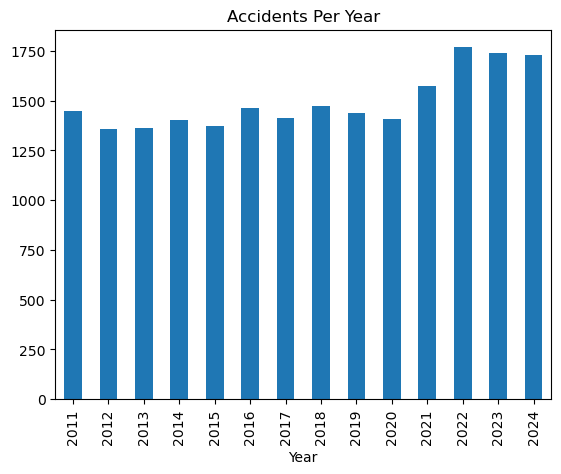

In [46]:
df_clean["Year"].value_counts().sort_index().plot(kind="bar")
plt.title("Accidents Per Year")
plt.show()

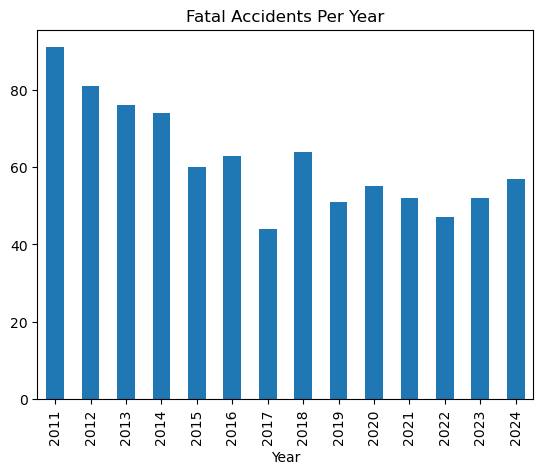

In [39]:
fatal_years = df_clean[df_clean["Fatalities"] > 0]["Year"].value_counts().sort_index()
fatal_years.plot(kind="bar")
plt.title("Fatal Accidents Per Year")
plt.show()


## Month and season analysaition

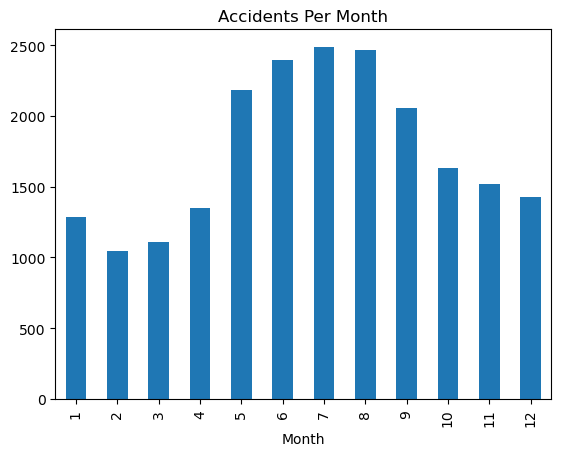

In [34]:
df_clean["Month"].value_counts().sort_index().plot(kind="bar")
plt.title("Accidents Per Month")
plt.show()

## Time analysaition

## Location and road type analysaition

## Speed limit analysaition

## Weather analysaition

## Participants’ types and risk behavior analysis

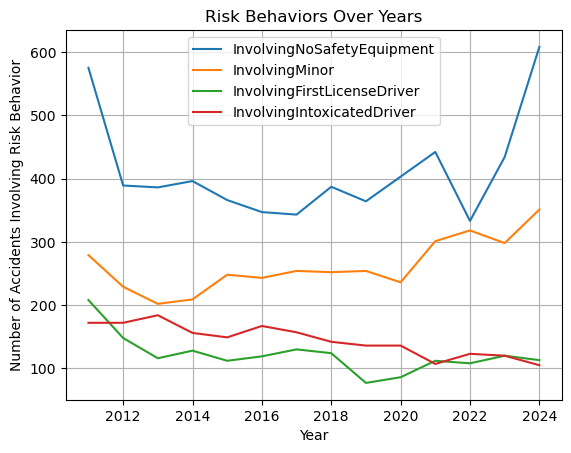

In [42]:
df_clean.groupby("Year")[[
    "InvolvingNoSafetyEquipment",
    "InvolvingMinor",
    "InvolvingFirstLicenseDriver",
    "InvolvingIntoxicatedDriver"   
]].sum().plot(kind="line")

plt.title("Risk Behaviors Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents Involving Risk Behavior")
plt.grid(True)
plt.legend()
plt.show()

## Drunk driver analysaition

## Deadly accidents' analysaition

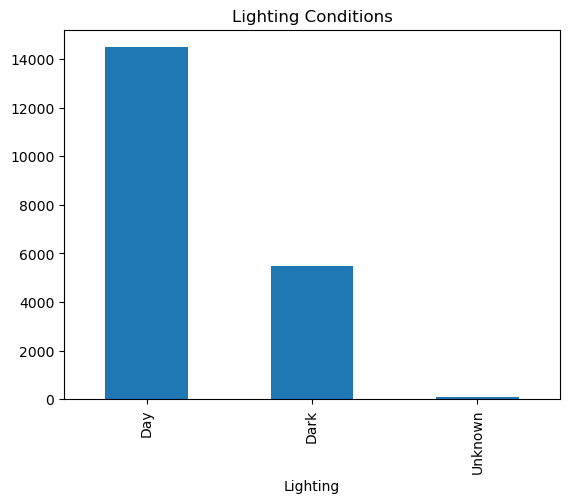

In [35]:
df_clean["Lighting"].value_counts().plot(kind="bar")
plt.title("Lighting Conditions")
plt.show()

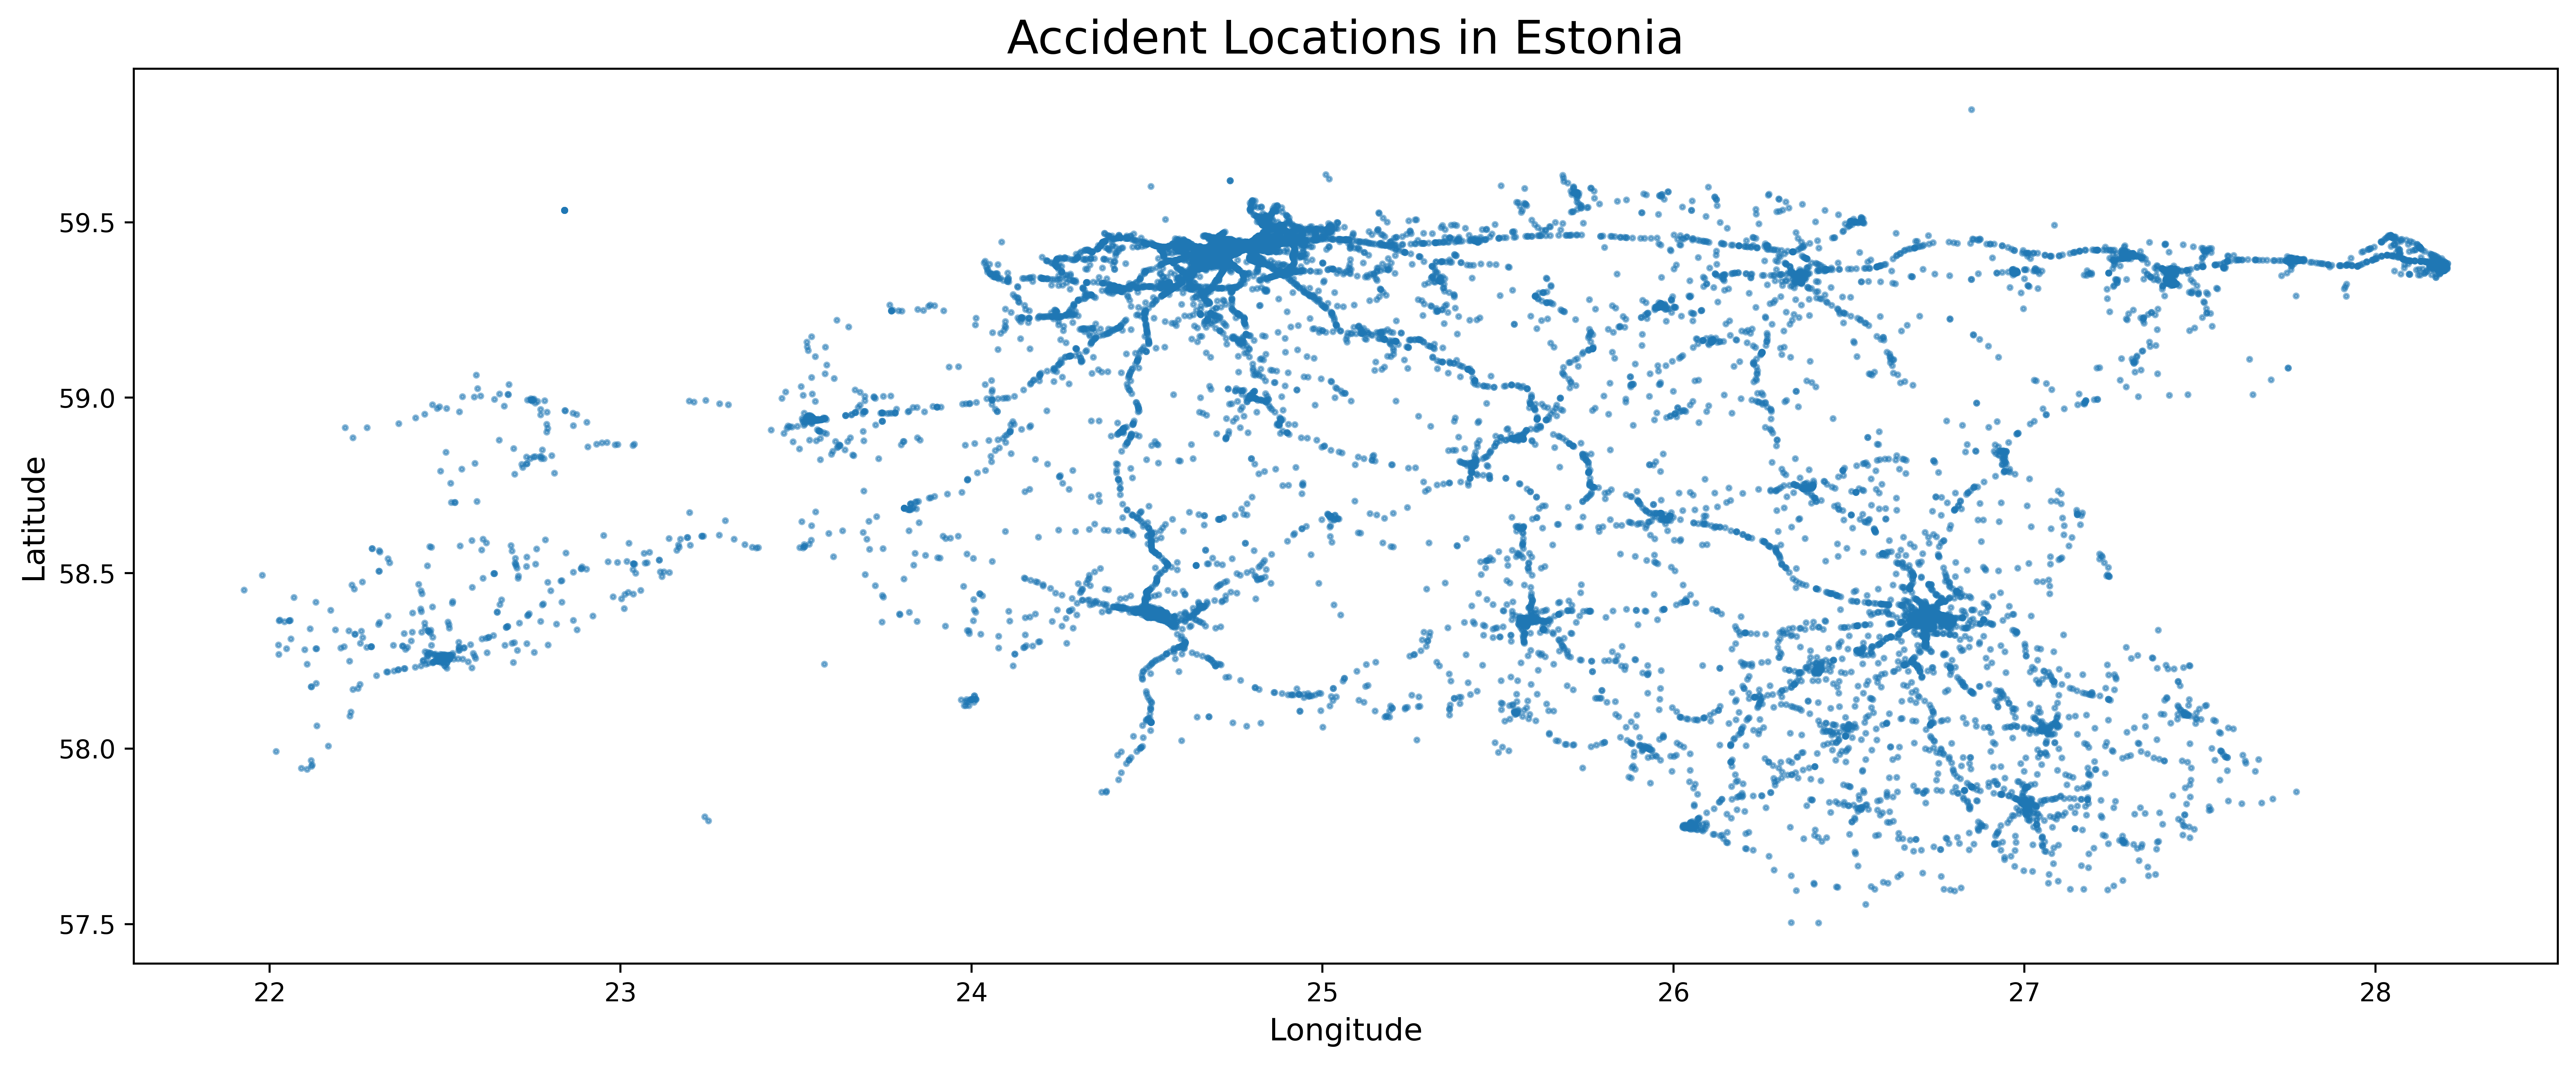

In [16]:
# Kui pole veel:
# !pip install pyproj

import matplotlib.pyplot as plt
from pyproj import Transformer

# 1. L-EST97 (EPSG:3301) -> WGS84 (EPSG:4326) teisendus
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

# Sinu failis on X/Y vahetuses -> kasutame Y kui X ja X kui Y
x_est = df_clean["Y_Coord"].values   # tegelik X
y_est = df_clean["X_Coord"].values   # tegelik Y

lon, lat = transformer.transform(x_est, y_est)

df_clean["lon"] = lon
df_clean["lat"] = lat

# 2. Filtreerime välja veidrad punktid (Eesti piirid ligikaudu)
mask = (
    (df_clean["lon"] > 21) & (df_clean["lon"] < 30) &
    (df_clean["lat"] > 57) & (df_clean["lat"] < 60)
)
df_est = df_clean[mask]

# 3. Joonistame kaardi hea resolutsiooni ja proportsiooniga
plt.figure(figsize=(14, 14), dpi=550)
plt.scatter(
    df_est["lon"],
    df_est["lat"],
    s=3,
    alpha=0.5
)

plt.title("Accident Locations in Estonia", fontsize=18)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()


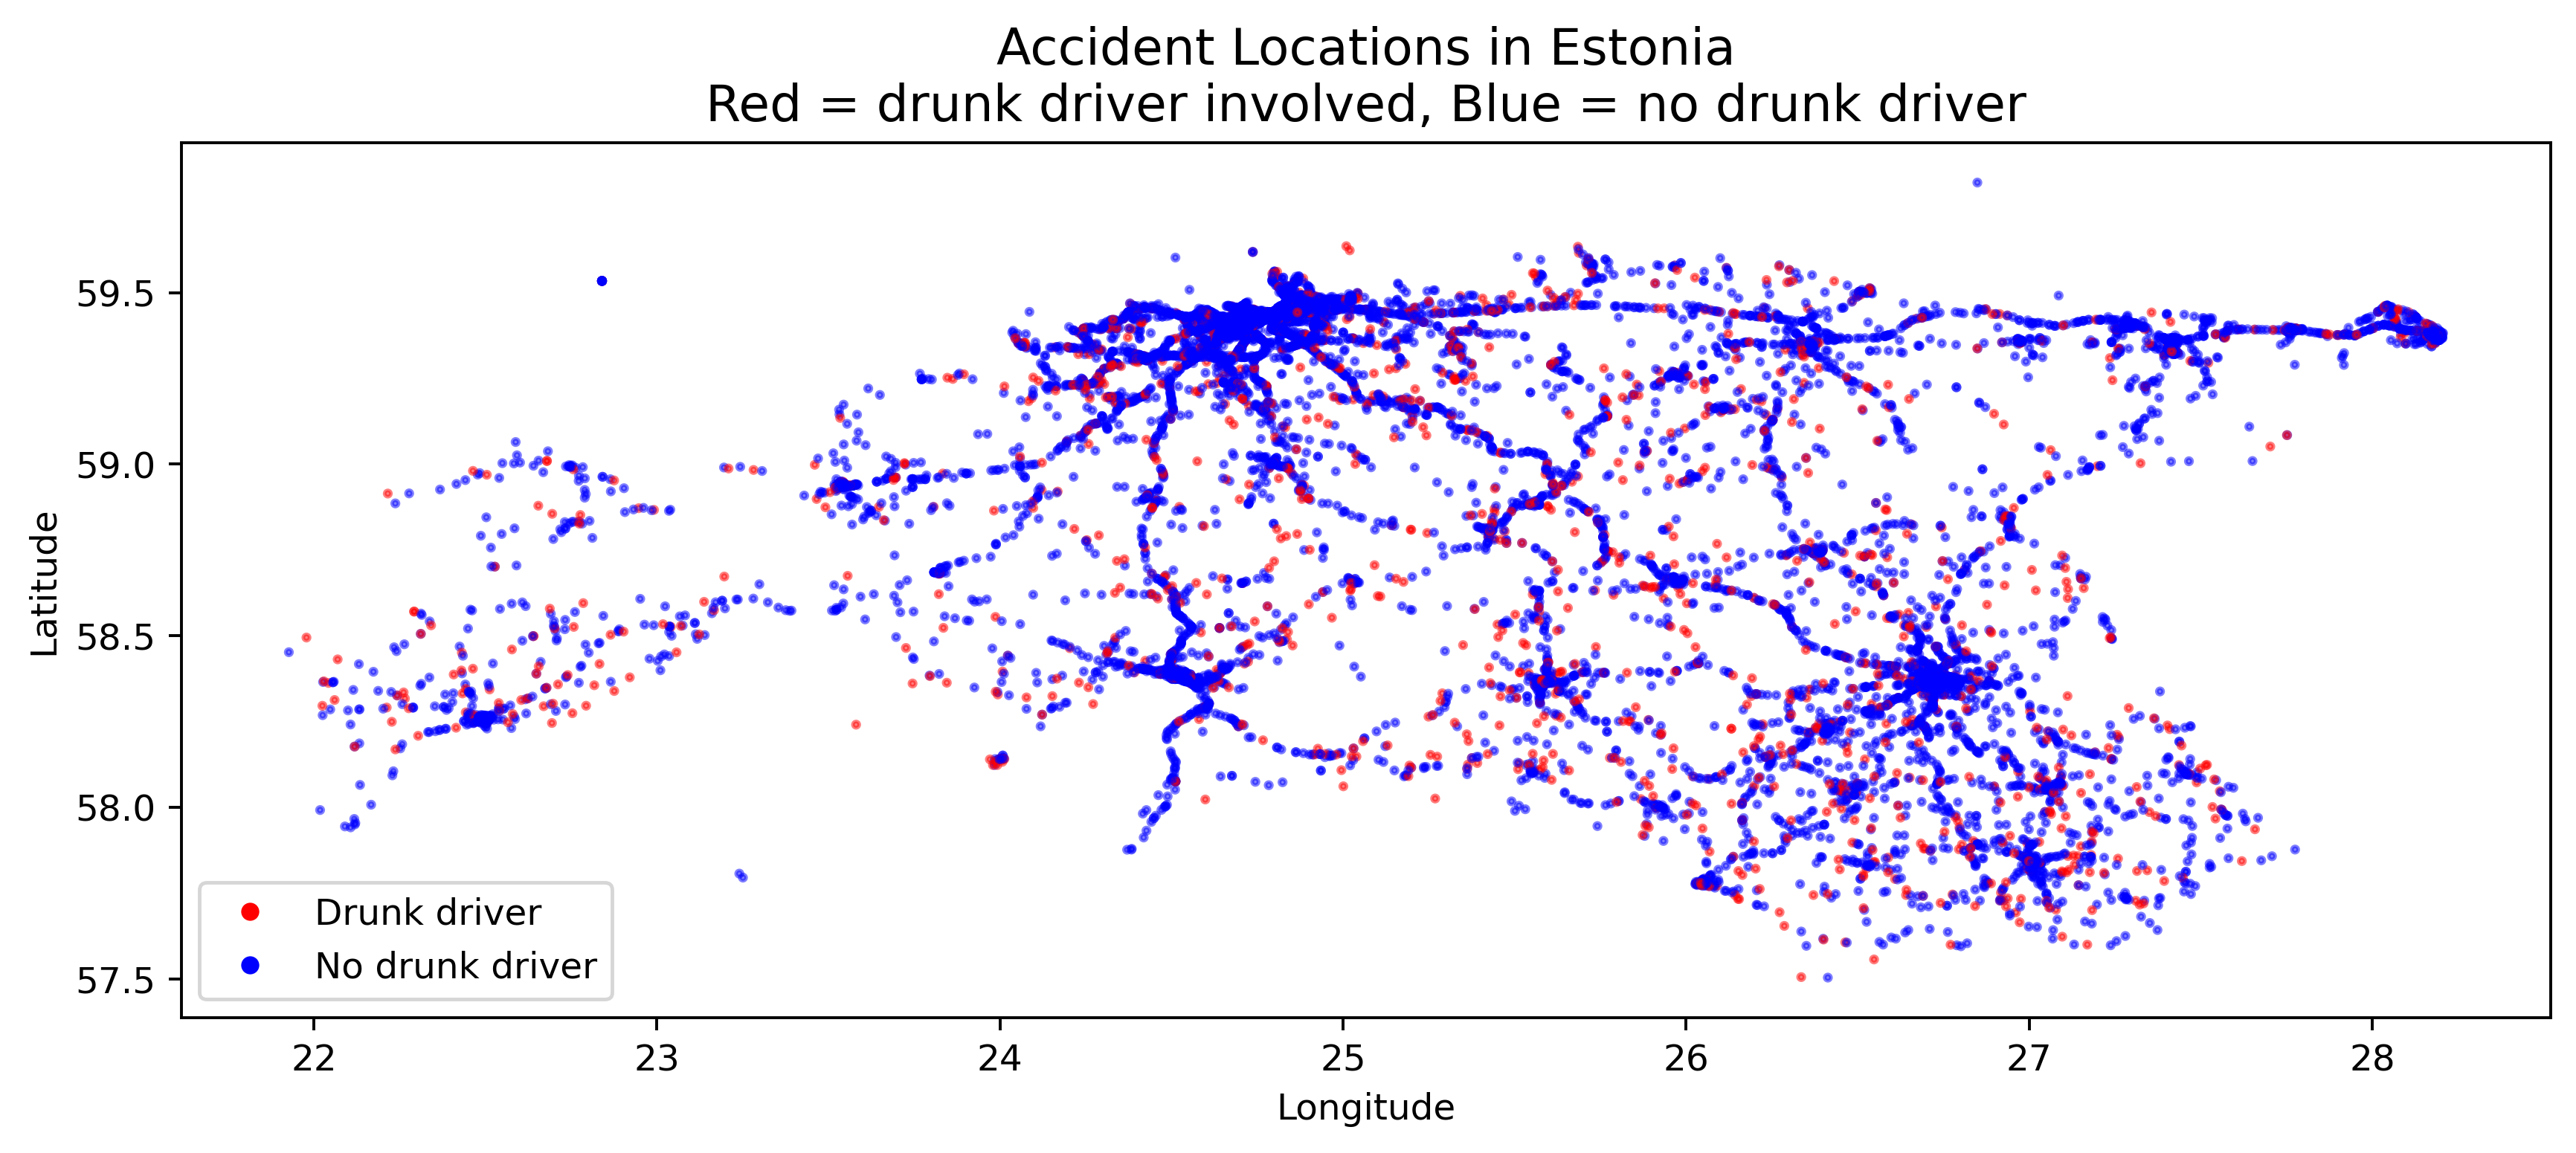

In [26]:
# !pip install pyproj

import matplotlib.pyplot as plt
from pyproj import Transformer
import numpy as np

# 1. Teisendame koordinaadid L-EST97 -> WGS84
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

x_est = df["Y koordinaat"].values   # tegelik X
y_est = df["X koordinaat"].values   # tegelik Y

lon, lat = transformer.transform(x_est, y_est)

df["lon"] = lon
df["lat"] = lat

# 2. Valime ainult punktid, kus joobes juhi info on teada (0 või 1)
col_drunk = "Joobes mootorsõidukijuhi osalusel"   # muuda kui sul on ingliskeelne nimi
df2 = df[df[col_drunk].isin([0.0, 1.0])].copy()

# Eesti piirid igaks juhuks
mask_ee = (
    (df2["lon"] > 21) & (df2["lon"] < 30) &
    (df2["lat"] > 57) & (df2["lat"] < 60)
)
df2 = df2[mask_ee]

# 3. Märgime värvid: joobes = punane, kaine = sinine
drunk_mask = df2[col_drunk] == 1.0
colors = np.where(drunk_mask, "red", "blue")

plt.figure(figsize=(10, 14), dpi=350)
plt.scatter(df2["lon"], df2["lat"], c=colors, s=3, alpha=0.5)

plt.title("Accident Locations in Estonia\nRed = drunk driver involved, Blue = no drunk driver", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()

# lihtne legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Drunk driver', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='No drunk driver', markerfacecolor='blue', markersize=6),
]
plt.legend(handles=legend_elements, loc='lower left')

plt.show()


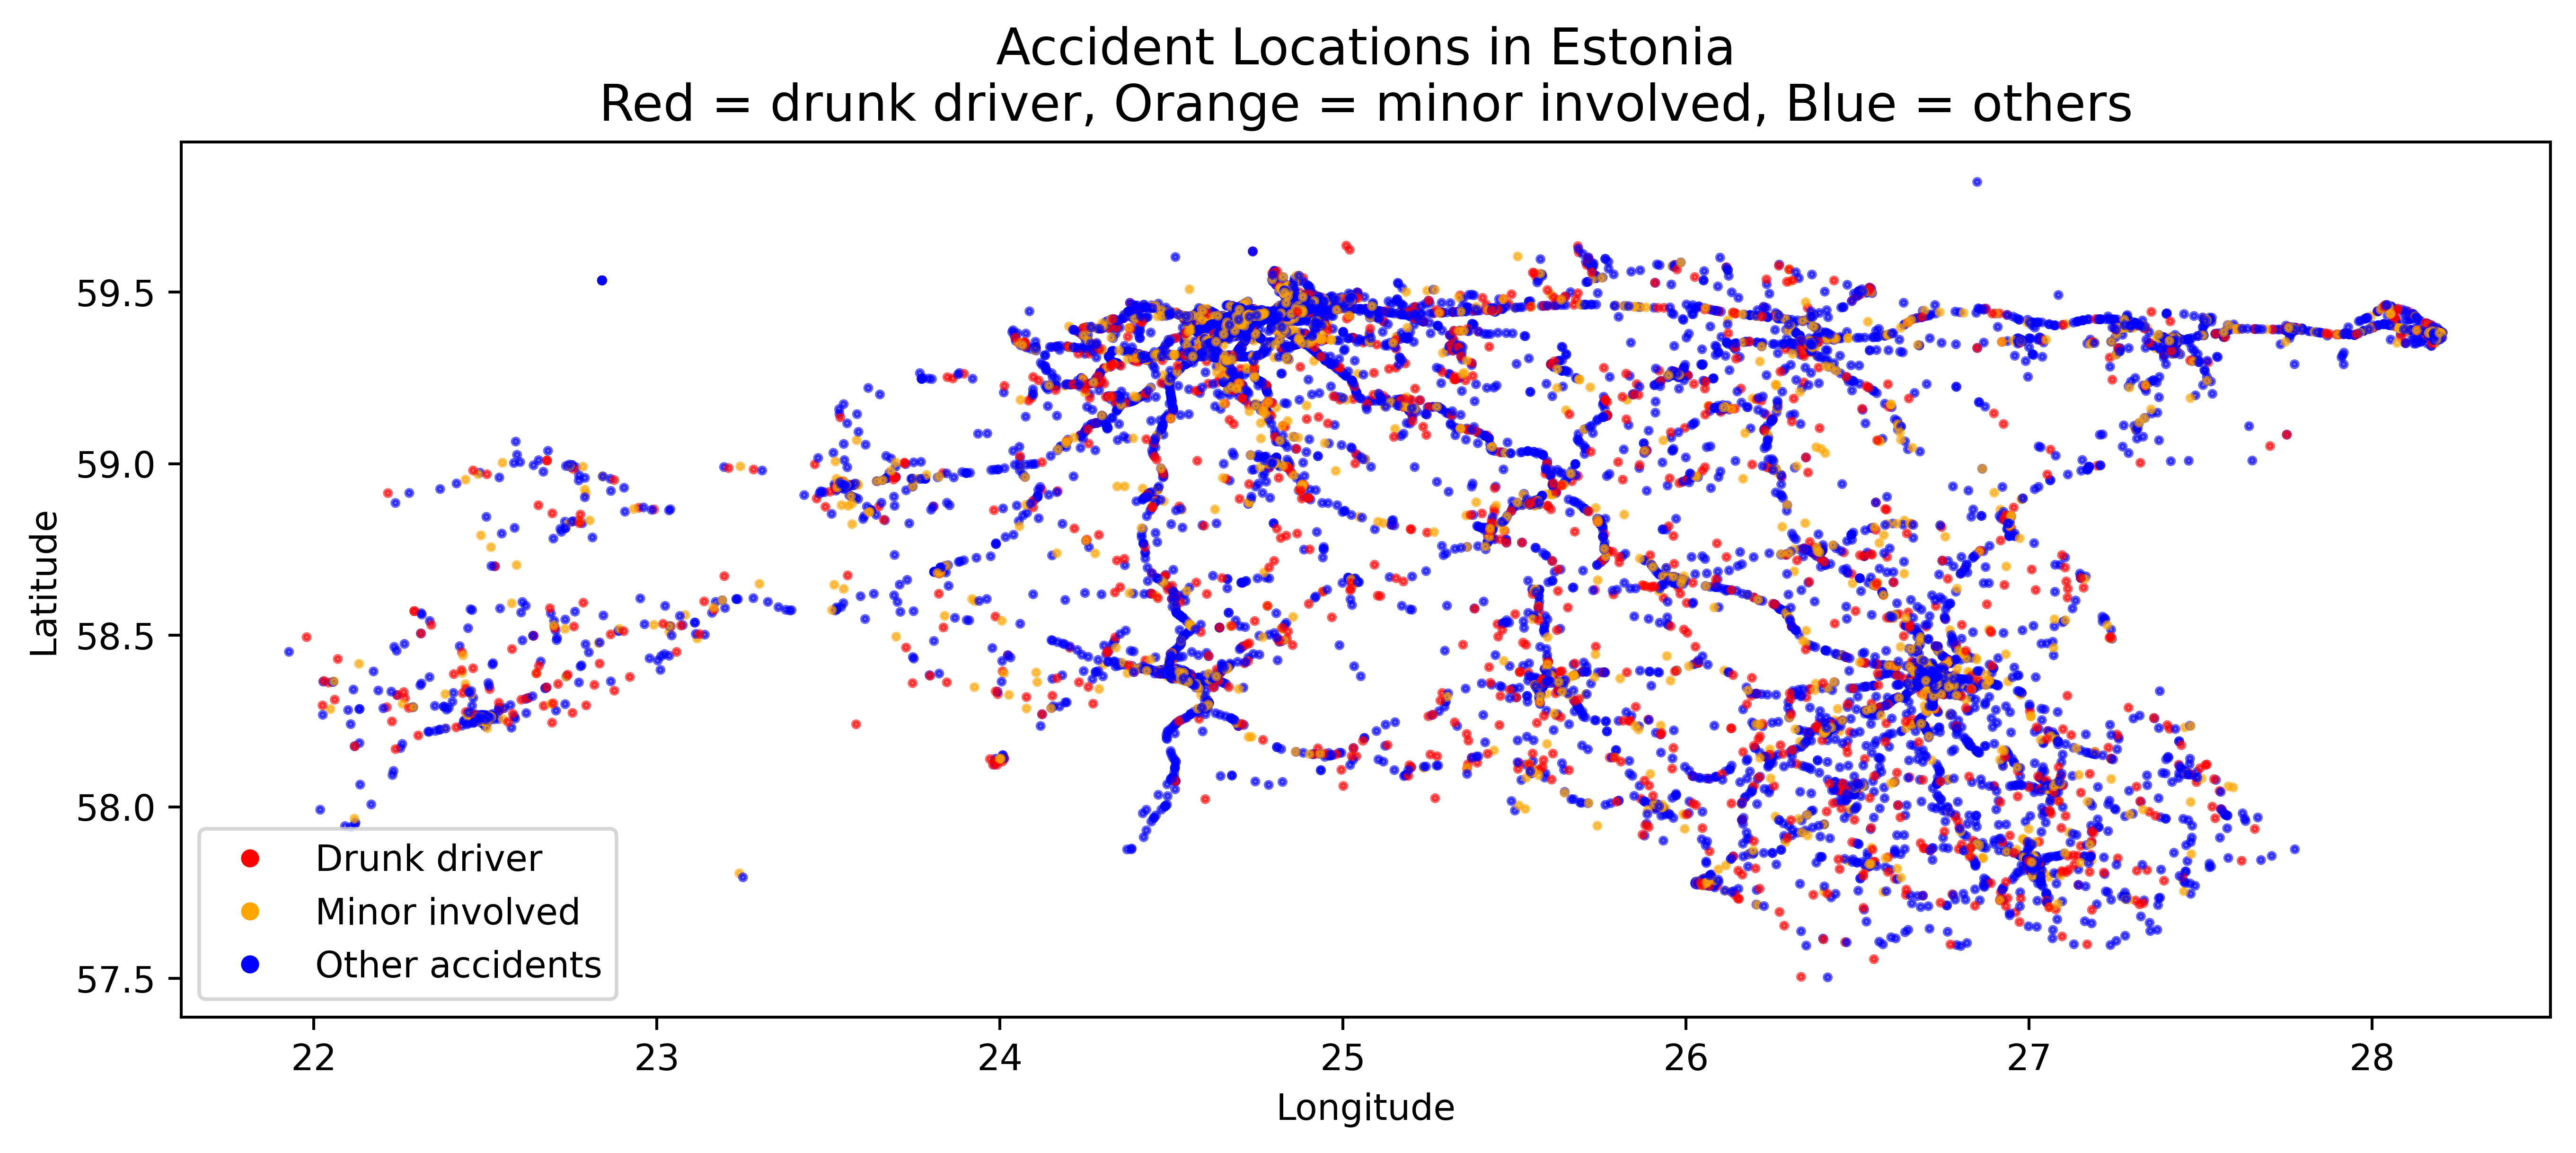

In [32]:
import matplotlib.pyplot as plt
from pyproj import Transformer
import numpy as np
from matplotlib.lines import Line2D

# 1. Convert L-EST97 -> WGS84 coordinates
transformer = Transformer.from_crs(3301, 4326, always_xy=True)

# Swap X/Y (your dataset has them reversed)
x_est = df["Y koordinaat"].values
y_est = df["X koordinaat"].values

lon, lat = transformer.transform(x_est, y_est)

df["lon"] = lon
df["lat"] = lat

# 2. Keep only Estonia area
mask_ee = (
    (df["lon"] > 21) & (df["lon"] < 30) &
    (df["lat"] > 57) & (df["lat"] < 60)
)
df2 = df[mask_ee].copy()

# 3. Column names
col_drunk = "Joobes mootorsõidukijuhi osalusel"
col_minor = "Alaealise osalusel"

# 4. Assign colors
# red = drunk, orange = minor, blue = normal
colors = np.where(
    df2[col_drunk] == 1.0, "red",
    np.where(df2[col_minor] == 1.0, "orange", "blue")
)

# 5. Plot
plt.figure(figsize=(10, 14), dpi=550)
plt.scatter(df2["lon"], df2["lat"], c=colors, s=3, alpha=0.6)

plt.title("Accident Locations in Estonia\nRed = drunk driver, Orange = minor involved, Blue = others", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()

# 6. Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Drunk driver', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Minor involved', markerfacecolor='orange', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Other accidents', markerfacecolor='blue', markersize=6)
]
plt.legend(handles=legend_elements, loc='lower left')

plt.show()
